Miguel Candido Aurora Peralta<br>
VIP Project: Transformative AI for Safety<br>
Project Title: Precipitation and San Francisco Traffic Accident Frequency

# Stage 1: Accident Mapping

## Data Acquisition and Cleaning
The data for this project will be acquired from SFGov's dataset titled "Traffic Crashes Resulting in Injury" and the NOAA's precipitation data for San Francisco. I am using data from 2021-01-01 to 2024-01-01. 



### Traffic Crashes Resulting in Injury dataset
[About the data, including column descriptions](https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx/about_data)

In [1]:
import pandas as pd

In [2]:
accidents_url = "https://data.sfgov.org/api/views/ubvf-ztfx/rows.csv?query=select%20*%20where%20%60collision_datetime%60%20%3E%3D%20%272021-01-01%27%20AND%20%60collision_datetime%60%20%3C%20%272024-01-01%27&read_from_nbe=true&version=2.1&date=20240309&accessType=DOWNLOAD"
accidents_df = pd.read_csv(accidents_url)

In [3]:
accidents_df.head(15)

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,point,data_as_of,data_updated_at,data_loaded_at
0,54614,24895000.0,NaN,210000028,37.785388,-122.408667,SFPD-INTERIM DB,CITY STREET,01/01/2021 12:04:00 AM,2021 January 01,...,Bicyclist,Not Stated,Proceeding Straight,Driver,West,Making Left Turn,POINT (-122.408667084 37.785388249),01/20/2021 12:00:00 AM,04/26/2023 12:00:00 AM,02/16/2024 04:12:43 PM
1,54683,20436000.0,6960000.0,210001242,37.718641,-122.390483,SFPD-INTERIM DB,CITY STREET,01/01/2021 02:33:00 PM,2021 January 01,...,Pedestrian,Not Stated,Not Stated,Driver,East,Proceeding Straight,POINT (-122.390482518 37.718641297),02/12/2021 12:00:00 AM,12/12/2023 12:00:00 AM,02/16/2024 04:12:43 PM
2,55022,22192000.0,NaN,210001430,37.723080,-122.452332,SFPD-INTERIM DB,CITY STREET,01/01/2021 04:43:00 PM,2021 January 01,...,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN,POINT (-122.452331561 37.723080244),01/07/2021 12:00:00 AM,12/12/2023 12:00:00 AM,02/16/2024 04:12:43 PM
3,55003,20569000.0,NaN,210001634,37.721517,-122.399925,SFPD-INTERIM DB,CITY STREET,01/01/2021 05:52:00 PM,2021 January 01,...,Driver,East,Making Left Turn,Driver,North,Proceeding Straight,POINT (-122.399925017 37.721517272),01/07/2021 12:00:00 AM,12/12/2023 12:00:00 AM,02/16/2024 04:12:43 PM
4,55024,24900000.0,NaN,210002347,37.785283,-122.409498,SFPD-INTERIM DB,CITY STREET,01/02/2021 06:32:00 AM,2021 January 02,...,Driver,South,Making Left Turn,Pedestrian,West,Proceeding Straight,POINT (-122.409497526 37.785282918),01/07/2021 12:00:00 AM,12/12/2023 12:00:00 AM,02/16/2024 04:12:43 PM
5,55021,21791000.0,11439105.0,210003038,37.731364,-122.435176,SFPD-INTERIM DB,CITY STREET,01/02/2021 02:30:00 PM,2021 January 02,...,Driver,South,Proceeding Straight,NaN,NaN,NaN,POINT (-122.435175953 37.731363899),01/07/2021 12:00:00 AM,12/12/2023 12:00:00 AM,02/16/2024 04:12:43 PM
6,55028,24359000.0,9111000.0,210003828,37.770874,-122.419690,SFPD-INTERIM DB,CITY STREET,01/02/2021 04:41:00 PM,2021 January 02,...,Driver,East,Changing Lanes,Driver,East,Proceeding Straight,POINT (-122.419690326 37.77087356),01/07/2021 12:00:00 AM,12/12/2023 12:00:00 AM,02/16/2024 04:12:43 PM
7,54949,23738000.0,1038000.0,210005040,37.759770,-122.400508,SFPD-INTERIM DB,CITY STREET,01/03/2021 02:42:00 PM,2021 January 03,...,Driver,East,Proceeding Straight,Parked Vehicle,Not Stated,Parked,POINT (-122.400508195 37.759770273),01/07/2021 12:00:00 AM,12/12/2023 12:00:00 AM,02/16/2024 04:12:43 PM
8,54684,26342000.0,NaN,210005250,37.770210,-122.445345,SFPD-INTERIM DB,CITY STREET,01/03/2021 04:33:00 PM,2021 January 03,...,Driver,South,Making Left Turn,Bicyclist,North,Proceeding Straight,POINT (-122.44534499 37.770210175),02/12/2021 12:00:00 AM,12/12/2023 12:00:00 AM,02/16/2024 04:12:43 PM
9,55023,27981000.0,5956000.0,210005567,37.771346,-122.510985,SFPD-INTERIM DB,CITY STREET,01/03/2021 05:30:00 PM,2021 January 03,...,Driver,West,Proceeding Straight,Driver,West,Stopped,POINT (-122.510984767 37.771345686),01/07/2021 12:00:00 AM,04/26/2023 12:00:00 AM,02/16/2024 04:12:43 PM


In [4]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   unique_id                8544 non-null   int64  
 1   cnn_intrsctn_fkey        8493 non-null   float64
 2   cnn_sgmt_fkey            3205 non-null   float64
 3   case_id_pkey             8544 non-null   object 
 4   tb_latitude              8492 non-null   float64
 5   tb_longitude             8492 non-null   float64
 6   geocode_source           8544 non-null   object 
 7   geocode_location         8544 non-null   object 
 8   collision_datetime       8544 non-null   object 
 9   collision_date           8544 non-null   object 
 10  collision_time           8541 non-null   object 
 11  accident_year            8544 non-null   int64  
 12  month                    8544 non-null   object 
 13  day_of_week              8536 non-null   object 
 14  time_cat                

#### Removing missing values
Removing entries that do not have latitude or longitude, as they cannot be plotted on the map. 

In [5]:
accidents_df = accidents_df.dropna(subset = ["tb_latitude", "tb_longitude"])

In [6]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8492 entries, 0 to 8543
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   unique_id                8492 non-null   int64  
 1   cnn_intrsctn_fkey        8492 non-null   float64
 2   cnn_sgmt_fkey            3205 non-null   float64
 3   case_id_pkey             8492 non-null   object 
 4   tb_latitude              8492 non-null   float64
 5   tb_longitude             8492 non-null   float64
 6   geocode_source           8492 non-null   object 
 7   geocode_location         8492 non-null   object 
 8   collision_datetime       8492 non-null   object 
 9   collision_date           8492 non-null   object 
 10  collision_time           8489 non-null   object 
 11  accident_year            8492 non-null   int64  
 12  month                    8492 non-null   object 
 13  day_of_week              8484 non-null   object 
 14  time_cat                 8491

#### Converting columns to datetimes

In [27]:
datetime_columns = ["collision_datetime", "collision_date", "data_updated_at", "data_loaded_at"]
accidents_df[datetime_columns] = accidents_df[datetime_columns].apply(pd.to_datetime)

C:\Users\miguelperalta\AppData\Local\Temp\ipykernel_16164\171905857.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\miguelperalta\AppData\Local\Temp\ipykernel_16164\171905857.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [28]:
accidents_df[datetime_columns].head(20)

,collision_datetime,collision_date,data_updated_at,data_loaded_at
0,2021-01-01 00:04:00,2021-01-01,2023-04-26,2024-02-16 16:12:43
1,2021-01-01 14:33:00,2021-01-01,2023-12-12,2024-02-16 16:12:43
2,2021-01-01 16:43:00,2021-01-01,2023-12-12,2024-02-16 16:12:43
3,2021-01-01 17:52:00,2021-01-01,2023-12-12,2024-02-16 16:12:43
4,2021-01-02 06:32:00,2021-01-02,2023-12-12,2024-02-16 16:12:43
5,2021-01-02 14:30:00,2021-01-02,2023-12-12,2024-02-16 16:12:43
6,2021-01-02 16:41:00,2021-01-02,2023-12-12,2024-02-16 16:12:43
7,2021-01-03 14:42:00,2021-01-03,2023-12-12,2024-02-16 16:12:43
8,2021-01-03 16:33:00,2021-01-03,2023-12-12,2024-02-16 16:12:43
9,2021-01-03 17:30:00,2021-01-03,2023-04-26,2024-02-16 16:12:43


### Precipitation data
Station: San Francisco Downtown
GHCND ID: USW00023272
Station information: [https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00023272/detail]

RCC-ACIS query builder: http://builder.rcc-acis.org/

In [29]:
import requests
import json

In [8]:
url = "http://data.rcc-acis.org/"
input_dict = {
    "sid":"USW00023272 6",
    "sdate":"2021-01-01",
    "edate":"2024-01-01",
    "elems":"4",
    "output":"json"}
params = {'params': json.dumps(input_dict)}
headers = {'Accept': 'application/json'}
req = requests.post('http://data.rcc-acis.org/StnData', data=params, headers=headers)
response = req.json()
acis_data = response['data']

In [200]:
precip_df = pd.DataFrame(acis_data, columns=["date", "precipitation_in"])

precip_df.set_index("date", inplace=True)

# convert precipitation values to a numeric datatype
precip_df["precipitation_in"] = pd.to_numeric(precip_df["precipitation_in"])

# convert index to datetimes 
precip_df.index = pd.to_datetime(precip_df.index)

precip_df

,precipitation_in
date,
2021-01-01,0.01
2021-01-02,0.20
2021-01-03,0.00
2021-01-04,0.24
2021-01-05,0.00
...,...
2023-12-28,0.00
2023-12-29,0.86
2023-12-30,0.15


## Weather columns in accidents dataset
The accidents dataset contains two columns, `weather_1` and `weather_2`. The webpage where the data was obtained from describes these columns as follows: 
- `weather_1`: the weather condition at the time of the crash
- `weather_2`: the weather condition at the time of the crash, if a second description is necessary

In [26]:
accidents_df.loc[:,"weather_1":"weather_2"].head(20)

,weather_1,weather_2
0,Clear,Not Stated
1,Clear,Not Stated
2,Clear,Not Stated
3,Clear,Not Stated
4,Cloudy,Raining
5,Cloudy,Raining
6,Raining,Not Stated
7,Clear,Not Stated
8,Cloudy,Not Stated
9,Clear,Not Stated


### What does this mean for the purposes of this project?
It is unclear when these weather conditions were noted after the accident. If the police response time was long, it may be different from the actual conditions when the accident took place. If you assume these are the actual conditions when the accident took place, it also does not account for any remaining water on the road after a precipitation event. <br><br>
It is most appropriate to combine these with the ACIS precipitation dataset to have the greatest understanding of the precipitation conditions at the time of the accident. 

## Adding precipitation data column to accidents_df

In [59]:
accidents_df.loc[accidents_df["collision_date"] == pd.to_datetime("2021-01-01")]

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,"(7793, daily_precip)","(7794, daily_precip)","(7795, daily_precip)","(7796, daily_precip)","(7797, daily_precip)","(7798, daily_precip)","(7799, daily_precip)","(7800, daily_precip)","(7801, daily_precip)","(7802, daily_precip)"
0,54614,24895000.0,NaN,210000028,37.785388,-122.408667,SFPD-INTERIM DB,CITY STREET,2021-01-01 00:04:00,2021-01-01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,54683,20436000.0,6960000.0,210001242,37.718641,-122.390483,SFPD-INTERIM DB,CITY STREET,2021-01-01 14:33:00,2021-01-01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,55022,22192000.0,NaN,210001430,37.723080,-122.452332,SFPD-INTERIM DB,CITY STREET,2021-01-01 16:43:00,2021-01-01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,55003,20569000.0,NaN,210001634,37.721517,-122.399925,SFPD-INTERIM DB,CITY STREET,2021-01-01 17:52:00,2021-01-01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [61]:
daily_precip_column = []

for i in accidents_df.index:
    date = accidents_df.loc[i, "collision_date"]
    precip_value = precip_df.loc[date, "precipitation_in"]
    daily_precip_column.append(precip_value)

accidents_df["daily_precip"] = daily_precip_column


## Analyzing relationship between precipitation and accident frequency
### Counting accidents by date

In [199]:
# creates a new dataframe with the number of accidents per date
daily_accidents_df = accidents_df.groupby(accidents_df["collision_date"].dt.date).size().reset_index(name="accident_count")
daily_accidents_df = daily_accidents_df.rename(columns={"collision_date":"date"})
daily_accidents_df.set_index("date", inplace=True)

# convert index to datetimes
daily_accidents_df.index = pd.to_datetime(daily_accidents_df.index)

# add missing dates
missing_dates = [x for x in precip_df.index if x not in daily_accidents_df.index]
daily_accidents_df.loc[missing_dates, "accident_count"] = 0

daily_accidents_df

,accident_count
date,
2021-01-01,4
2021-01-02,3
2021-01-03,7
2021-01-04,7
2021-01-05,5
...,...
2023-12-27,6
2023-12-28,6
2023-12-29,10


### Summary statistics

In [86]:
daily_accidents_df.describe()

,accident_count
count,1094.000000
mean,7.762340
std,3.074883
min,1.000000
25%,6.000000
50%,7.000000
75%,10.000000
max,18.000000


In [89]:
print(f"Sum of all accidents in dataset from 1/1/21 to 1/1/24: {accidents_df.size}")

Sum of all accidents in dataset from 1/1/21 to 1/1/24: 66314028


In [90]:
precip_df.describe()

,precipitation_in
count,1096.000000
mean,0.060347
std,0.276535
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.460000


### Visualizing datasets

In [117]:
from matplotlib import pyplot as plt
import seaborn as sns

In [100]:
accident_count_distribution = daily_accidents_df.groupby(daily_accidents_df["accident_count"]).size().reset_index(name='num_days')
accident_count_distribution

,accident_count,num_days
0,1,8
1,2,26
2,3,42
3,4,70
4,5,122
5,6,128
6,7,152
7,8,130
8,9,113
9,10,108


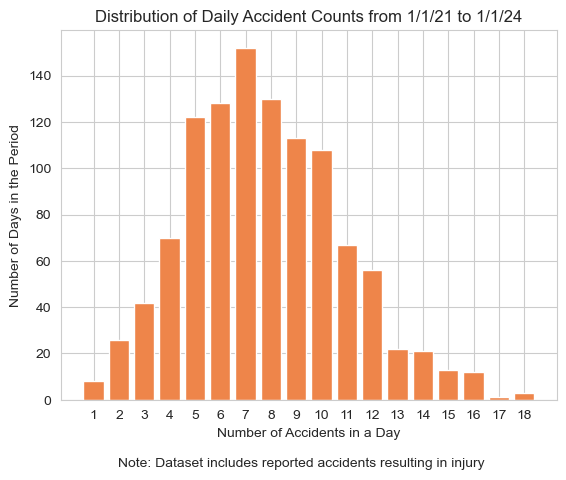

In [129]:
sns.set_style("whitegrid")
muted_palette = sns.color_palette("muted")
orange = muted_palette[1]

plt.bar(x=accident_count_distribution["accident_count"],
        height=accident_count_distribution["num_days"],
        color=orange)
plt.xticks(accident_count_distribution["accident_count"])

plt.title("Distribution of Daily Accident Counts from 1/1/21 to 1/1/24")
plt.xlabel("Number of Accidents in a Day")
plt.ylabel("Number of Days in the Period")
plt.text(0.5, -0.03, "Note: Dataset includes reported accidents resulting in injury", 
         fontsize=10, ha='center', transform=plt.gcf().transFigure)

plt.show()

In [131]:
precip_distribution = precip_df.groupby(precip_df["precipitation_in"]).size().reset_index(name="num_days")
precip_distribution

,precipitation_in,num_days
0,0.00,906
1,0.01,24
2,0.02,18
3,0.03,6
4,0.04,10
...,...,...
76,1.40,1
77,1.60,1
78,2.57,1
79,4.02,1


906

Text(0.5, -0.03, 'Days with 0 inches of precipitation: 906')

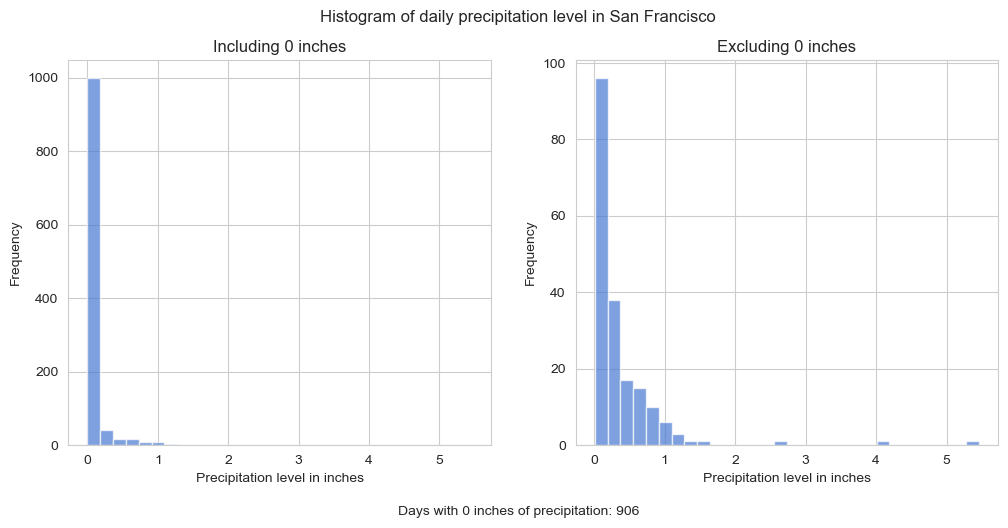

In [153]:
sns.set_style("whitegrid")
blue = muted_palette[0]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.suptitle("Histogram of daily precipitation level in San Francisco")

# first plot: histogram including 0 inch values
axes[0].hist(precip_df['precipitation_in'], bins=30, color=blue, alpha=0.7)
axes[0].set_xlabel("Precipitation level in inches")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Including 0 inches")

# second plot: excluding 0 inch values
axes[1].hist(precip_df[precip_df['precipitation_in'] > 0], bins=30, color=blue, alpha=0.7)
axes[1].set_xlabel("Precipitation level in inches")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Excluding 0 inches")

days_with_zero_precip = precip_df[precip_df["precipitation_in"] == 0].size
text_below_plot = f"Days with 0 inches of precipitation: {days_with_zero_precip}"
plt.text(0.5, -0.03, text_below_plot, 
         fontsize=10, ha='center', transform=plt.gcf().transFigure)

In [214]:
correlation = daily_accidents_df['accident_count'].corr(precip_df['precipitation_in'])
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.025153188624045843


Text(0.5, 1.0, 'Relationship between Accidents and Precipitation')

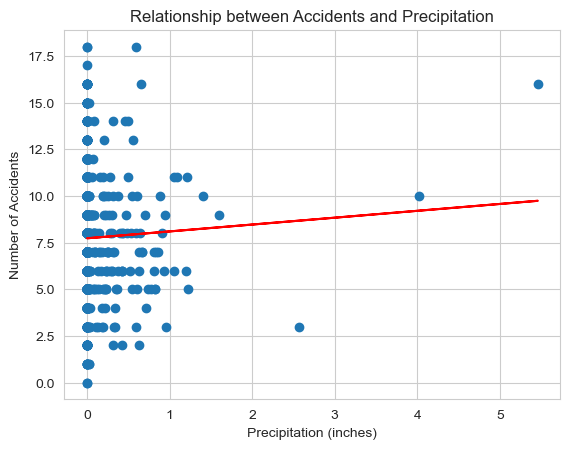

In [213]:
import numpy as np 
m, b = np.polyfit(precip_df['precipitation_in'], daily_accidents_df
['accident_count'], 1)
plt.scatter(precip_df['precipitation_in'], daily_accidents_df['accident_count'])
plt.plot(precip_df['precipitation_in'], m*precip_df['precipitation_in'] + b, color='red', label='Trendline')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Number of Accidents')
plt.title('Relationship between Accidents and Precipitation')



## Mapping the data
I am using the Plotly library in combination with Mapbox.

In [52]:
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [217]:
app = dash.Dash(__name__)

# generate marks for the RangeSlider
marks = {}
max_precip = accidents_df['daily_precip'].max()

for i in range(int(max_precip / 0.25) + 1):
    precip_value = i * 0.25
    if precip_value != max_precip:
        marks[precip_value] = str(precip_value)
    else:
        marks[precip_value] = str(precip_value)

# columns from accidents_df to show when hovering over a point on the map
hover_data = ["tb_latitude", "tb_longitude", "collision_date", "daily_precip"]        

# title of visualization
app.title = "San Francisco Accident Map"

# define layout of the dash app
app.layout = html.Div(
    children = [

        # headers
        html.H1(
            "Map of San Francisco Traffic Accidents Resulting in Injury, 1/1/2021-1/1/2024",
            style={'fontFamily': 'Arial', 'color': '#0e0b16'}
        ),
        html.H2(
            "Move the slider to filter accidents by daily precipitation level",
            style={'fontFamily': 'Arial', 'color': '#0e0b16'}
        ),

        # precipitation filter slider
        dcc.RangeSlider(
            id='precip-range-slider',
            # user can only select between minimum and maximum values in dataset
            min=accidents_df['daily_precip'].min(),
            max=accidents_df['daily_precip'].max(),
            step=None,
            marks=marks,
            value=[accidents_df['daily_precip'].min(), accidents_df['daily_precip'].max()]
        ),

        # render graph and specify id
        dcc.Graph(id='map-plot')
    ],

    style = {'backgroundColor': "#DFDCE3"}
)

# callback function that calls update_map_plot when input values change
@app.callback(
    Output('map-plot', 'figure'),
    [Input('precip-range-slider', 'value')]
)
# slider values are passed to update_map_plot
def update_map_plot(precip_range):
    # filters df based on slider values
    filtered_df = accidents_df[(accidents_df['daily_precip'] >= precip_range[0]) & 
                                (accidents_df['daily_precip'] <= precip_range[1])]
    # generates new figure based on filtered df
    fig = px.scatter_mapbox(filtered_df, 
                            lat="tb_latitude", 
                            lon="tb_longitude", 
                            mapbox_style="open-street-map",
                            opacity=1, 
                            zoom=11.25,
                            width=800,
                            height=800,
                            hover_data=hover_data)
    # returns the new figure
    return fig


# runs the dash app
if __name__ == '__main__':
    app.run_server(debug=True)